## Methods ##

#### Data Generation ####

In [1]:
import pickle

with open('data/processed_dataset.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

In [2]:
import numpy as np
import src.projection as proj

# edm = content['6GSA']['3D_map']

# print(np.min(edm))
# print(np.max(edm))
# proj.visualize_projection(np.sum(edm, axis=2))

In [3]:
import numpy as np
import src.projection as proj
import time

pdrs = {}

for pdb_id, metadata in content.items():
    edm = metadata["3D_map"]
    if np.count_nonzero(edm) > 0.5 * np.size(edm):
        continue
    print(pdb_id)
    cur_time = time.time()
    normalized_edm = proj.normalize_edm(edm)
    print(f"Normalization: {time.time() - cur_time}")
    cur_time = time.time()
    pdr = proj.point_density_representation(normalized_edm)
    print(f"PDR: {time.time() - cur_time}")
    cur_time = time.time()
    pdrs[pdb_id] = pdr

6GL7
Normalization: 13.067872285842896
PDR: 6.81847882270813
6GOV
Normalization: 2.943895101547241
PDR: 1.6837701797485352


In [7]:
for id, pdr in  pdrs.items():
    print(len(pdr), len(pdr)/ np.size(content[id]["3D_map"]))

3921074 0.06126678125
1050347 0.07597996238425926


[[-0.17679334  0.10048445  0.9791052 ]
 [-0.85868903 -0.50192935 -0.10353781]
 [ 0.48103769 -0.85905169  0.17502266]]
[[ 0.38928423 -0.72314661 -0.57054077]
 [ 0.24181428 -0.51744407  0.82083951]
 [-0.88881024 -0.45750478 -0.02656564]]
[[ 0.31059239  0.61678518 -0.72326234]
 [ 0.92454311 -0.01927729  0.38058957]
 [ 0.22079947 -0.78689544 -0.57623186]]
Random projection: 100.3736801147461


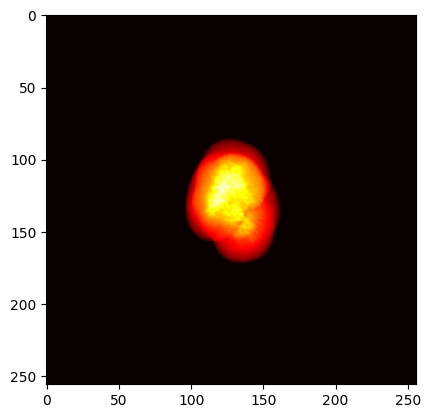

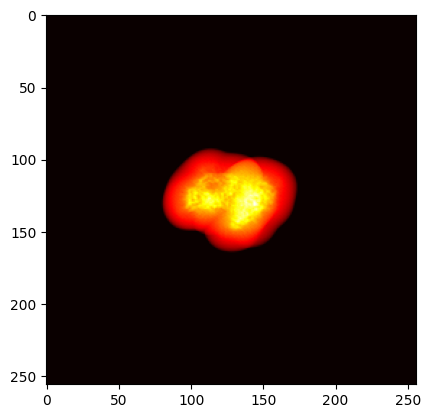

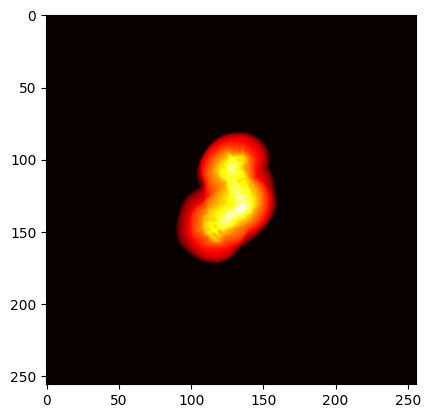

[[-0.17679334  0.10048445  0.9791052 ]
 [-0.85868903 -0.50192935 -0.10353781]
 [ 0.48103769 -0.85905169  0.17502266]]
[[ 0.38928423 -0.72314661 -0.57054077]
 [ 0.24181428 -0.51744407  0.82083951]
 [-0.88881024 -0.45750478 -0.02656564]]
[[ 0.31059239  0.61678518 -0.72326234]
 [ 0.92454311 -0.01927729  0.38058957]
 [ 0.22079947 -0.78689544 -0.57623186]]
Random projection: 23.289419651031494


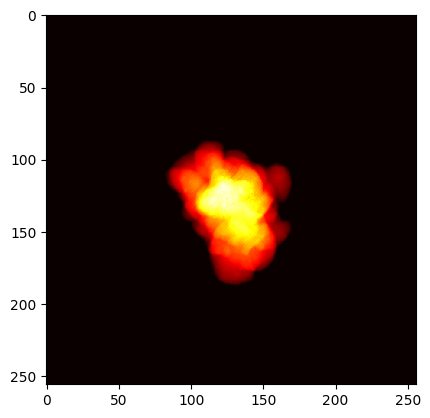

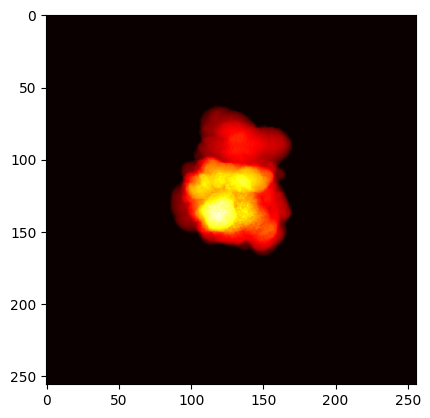

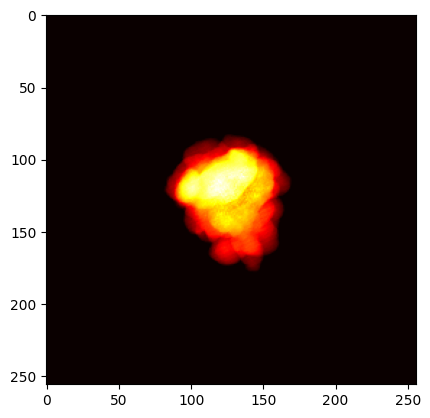

In [6]:
import numpy as np
import src.projection as proj

shape = (256, 256)
projection_dict = {}

for pdb_id, pdr in pdrs.items():
    cur_time = time.time()
    random_projs = proj.random_projection(pdr, shape=shape, batch_size = 3)
    print(f"Random projection: {time.time() - cur_time}")
    for projection in random_projs:
        proj.visualize_projection(projection)
    projection_dict[pdb_id] = random_projs

#### Projection onto Half-Sphere ####

In [ ]:
projector = proj.Image2SphereProjector(fmap_shape=(1,)+shape, sphere_fdim=3, lmax=4)
for pdb_id, random_projs in projection_dict.items():
    for fmap in random_projs:
        proj.visualize_spherical_projection(fmap, projector)

#### Training Spherical CNN ####

#### Visualizing Embeddings ####

#### Empirical Proof of Equivariance ####

#### Sketch of Reconstruction Algorithm ####